In [2]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
path1="/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2/"
img_list=[x for x in sorted(glob(path1+"/masks/*"))]
img_list

['/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000001.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000002.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000003.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000004.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000005.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000006.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000007.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000008.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000009.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000010.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000011.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000012.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000013.png',
 '/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/000014.png',
 '/home/saab/Desktop/Backup_ws3_30

In [17]:
path2="train_test_gt"
os.makedirs(path2,exist_ok=True)
#path3="010222_trial2_post_hist"
#os.makedirs(path3,exist_ok=True)

In [18]:
zero=np.zeros([256,256],np.uint8)
x=0
lst=[]
l2=[]
l3=[]
for y in img_list:
    img_p_main=glob(y+"/*")
    if(len(img_p_main)==21):
        l3.append(y.split("/")[-1])
        for im_p in img_p_main:
            img=cv2.imread(im_p)
            b,g,r=cv2.split(img)
            #img2=cv2.merge([zero,g,zero])
            ret,thresh1 = cv2.threshold(g,150,255,cv2.THRESH_BINARY)
            plt.figure()
            plt.imshow(cv2.resize(thresh1*g/255,(50,50)),cmap="gray",vmin=0,vmax=200)
            plt.axis("off")
            plt.savefig(path2+"/"+f"{x:06d}"+".png")
            plt.close()
            plt.imsave(path3+"/"+f"{x:06d}"+".png",thresh1*g/255,cmap="gray")
            lst.append(sum((thresh1*g/(255*255)).reshape(-1)))
            if(len(lst)==21):
                l2.append(sum(lst))
                lst=[]
            x=x+1
            #lst.append(np.count_nonzero(thresh1))
            #histogram, bin_edges = np.histogram(thresh1*g, bins=256, range=(0,255))
            #plt.figure()
            #plt.title("Grayscale Histogram")
            #plt.xlabel("grayscale value")
            #plt.ylabel("pixels")
            #plt.xlim([0.0, 255])  # <- named arguments do not work here

            #plt.plot(bin_edges[0:-1], histogram)

            #plt.savefig(path3+"/"+f"{x:06d}"+".png")
            #plt.close()
            

In [19]:
y

'/home/saab/Desktop/Backup_ws3_301221/sd_cd3_t2//masks/014872.png'

In [55]:
df=pd.DataFrame(zip(l3,l2),columns=["Patient","Area"])

In [22]:
df.to_csv("areas_t2.csv",index=False)

In [12]:
max((thresh1*g/255).reshape(-1))

0.0

In [16]:
max(thresh1.reshape(-1))

0

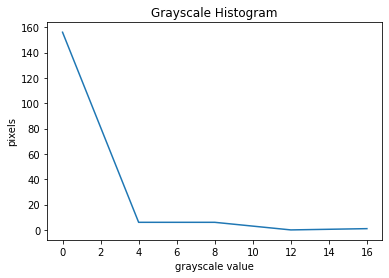

In [58]:
histogram, bin_edges = np.histogram(l2, bins=5, range=(0,20))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
#plt.xlim([0.0, 255])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)

            #plt.savefig(path3+"/"+f"{x:06d}"+".png")
            #plt.close()

In [52]:
df2=pd.read_csv("../GSK_RSEM_rerun_expCounts_172_Tumor.csv")

In [53]:
df2=df2.dropna()
df2=df2.drop('Ensembl.ID',axis=1)
df2=df2.drop('Gene.type',axis=1)
df2.to_csv("../ciber_test2.csv")
df2.to_csv("../ciber_np.txt", header=None, index=None, sep=' ', mode='a')